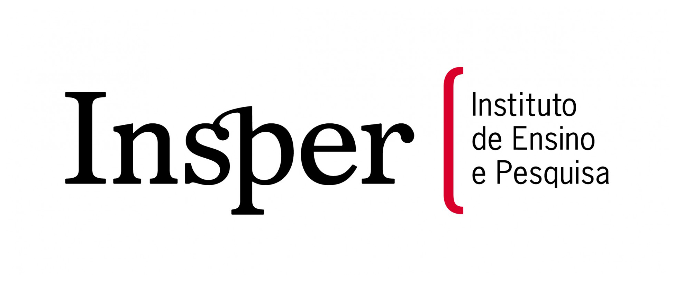

# Computação para Ciências dos Dados

<sub><a href="https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/">PÓS-GRADUAÇÃO EM DATA SCIENCE E DECISÃO</a></sub>

## Dica do Dia: 003

O objetivo desta dica do dia é explorar mais sobre WEB Scraping e como obter dados estruturados (tabular) de páginas na Internet, com a tag HTML &lt;TABLE&gt;&lt;/TABLE&gt;

> Todos os dias no período de contingência pelo Coronavirus (COVID-19) vamos enviar uma breve dica sobre Python para ciências dos dados em um jupyter notebook, conteúdo adicional ao curso que pode ser utilizado nos projetos

### WEB Scraping dados estruturados (tabular)

Temos disponível na WEB petabytes em dados texto de páginas a maior parte em HTML. Podemos obter informações de empresas e instituiçõe quando não há API disponível. Vamos garimpar estas informações com WEB Scraping.

Importar as bibliotecas.<BR>
Usamos BeautifulSoup para fazer o parser das páginas HTML

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Vamos garimpar os dados financeiros estruturados tabulares no site do Yahoo

In [2]:
response=requests.get("https://finance.yahoo.com/quote/%5EGSPC/history/")

In [3]:
response.text[:1000]

'<!DOCTYPE html><html id="atomic" class="NoJs featurephone" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"/><title>S&amp;P 500 (^GSPC) Historical Data - Yahoo Finance</title><meta name="keywords" content="^GSPC, S&amp;P 500, ^GSPC historical prices, S&amp;P 500 historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="90376669494"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Get historical data for the S&amp;P 500 (^GSPC) on Yahoo Finance. View and download daily, weekly or monthly data to help your investment decisions."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidate

As inforações são recebidas em formato texto, conforme o característica do protocolo HTTP<br>
Passamos o texto original para o BS realizar o parser

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

Na estrutura do [DOM](https://en.wikipedia.org/wiki/Document_Object_Model) (Document Object Model) do HTML, vamos separar a tag TABLE:

In [5]:
table = soup.find(name='table')

In [6]:
table

<table class="W(100%) M(0)" data-reactid="31" data-test="historical-prices"><thead data-reactid="32"><tr class="C($tertiaryColor) Fz(xs) Ta(end)" data-reactid="33"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="34"><span data-reactid="35">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">High</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Volume</span></th></tr></thead><tbody data-reactid="48"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="49"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="50"><span data-reactid="51">Mar 16

Converter novamente para texto (string)

In [8]:
table_str = str(table)

Carregar os dados no dataframe Pandas, utilizando seu próprio parser HTML

In [9]:
df_sp500 = pd.read_html(table_str)[0]

In [10]:
df_sp500.sample(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume
8,"Mar 04, 2020",3045.75,3130.97,3034.38,3130.12,3130.12,5035480000
22,"Feb 12, 2020",3370.50,3381.47,3369.72,3379.45,3379.45,3926380000
47,"Jan 07, 2020",3241.86,3244.91,3232.43,3237.18,3237.18,3420380000
53,"Dec 27, 2019",3247.23,3247.93,3234.37,3240.02,3240.02,2428670000
92,"Oct 31, 2019",3046.90,3046.90,3023.19,3037.56,3037.56,4139280000
52,"Dec 30, 2019",3240.09,3240.92,3216.57,3221.29,3221.29,3013290000
74,"Nov 26, 2019",3134.85,3142.69,3131.00,3140.52,3140.52,4595590000
65,"Dec 10, 2019",3135.36,3142.12,3126.09,3132.52,3132.52,3343790000
37,"Jan 22, 2020",3330.02,3337.77,3320.04,3321.75,3321.75,3619850000
34,"Jan 27, 2020",3247.16,3258.85,3234.50,3243.63,3243.63,3823100000


Todos os campos do dataframe Pandas estão em formato texto (string)

In [20]:
df_sp500["Open"][1]

'2630.86'

Precisamos apagar as linhas que não são interessante e não vão ser convertidas para tipos numéricos (int ou float)

In [26]:
df_sp500 = df_sp500.drop(100)

Podemos fazer a conversão completa do dataframe para numérico quando for possível, e manter texto (string) onde for adequado

In [29]:
df_sp500 = df_sp500.apply(pd.to_numeric, errors='ignore')

Podemos também converter apenas uma coluna do dataframe Pandas

In [27]:
df_sp500['Open'] = df_sp500['Open'].astype(float)

In [30]:
df_sp500["Open"][1]

2630.86

Uma vez as colunas numéricas convertidas, podemos realizar operações aritméticas, geração de gráficos e por fim a análise de dados

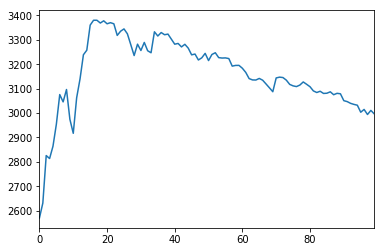

In [31]:
df_sp500["Open"].plot()

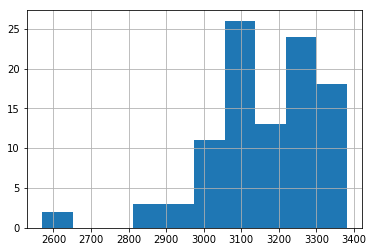

In [33]:
df_sp500["Open"].hist()

In [34]:
df_sp500.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,100.000000,100.000000,100.00000,100.000000,100.000000,1.000000e+02
mean,3159.748600,3175.075800,3139.94200,3159.036300,3159.036300,4.083251e+09
std,150.858058,142.623358,168.10964,154.867025,154.867025,1.367785e+09
min,2569.990000,2660.950000,2478.86000,2480.640000,2480.640000,1.296540e+09
25%,3081.137500,3096.545000,3073.22250,3089.425000,3089.425000,3.454872e+09
50%,3146.335000,3179.395000,3138.90500,3149.770000,3149.770000,3.702650e+09
75%,3267.305000,3283.687500,3255.13000,3273.725000,3273.725000,4.065178e+09
max,3380.450000,3393.520000,3378.83000,3386.150000,3386.150000,8.829380e+09


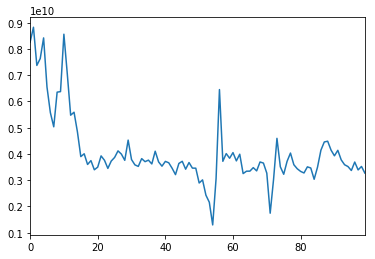

In [36]:
df_sp500['Volume'].plot()

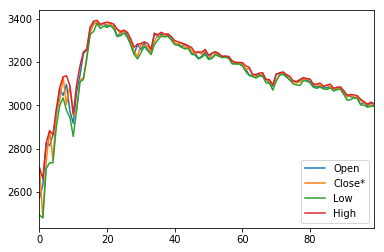

In [65]:
df_sp500[['Open','Close*','Low','High']].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc060dd30>,
      dtype=object)

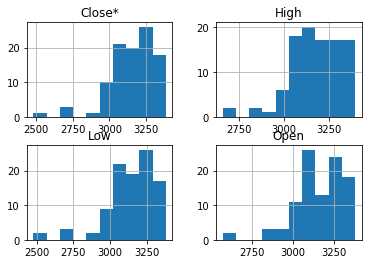

In [66]:
df_sp500[['Open','Close*','Low','High']].hist()

__Atividade:__ Encontrar uma página WEB com dados estruturados (tabulares) relevantes para a sua área de atuação profissional ou formação. Carregar os dados em um dataframe Pandas e gerar gráficos para analisar visualmente as informações

Para saber mais:

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start
- https://pandas.pydata.org/docs/
- https://www.w3schools.com/html/default.asp
- https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f
- https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/